In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('car_fuel_efficiency.csv')
df.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# keep the neccesary columns 

df1 = df.loc[:, ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df1.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

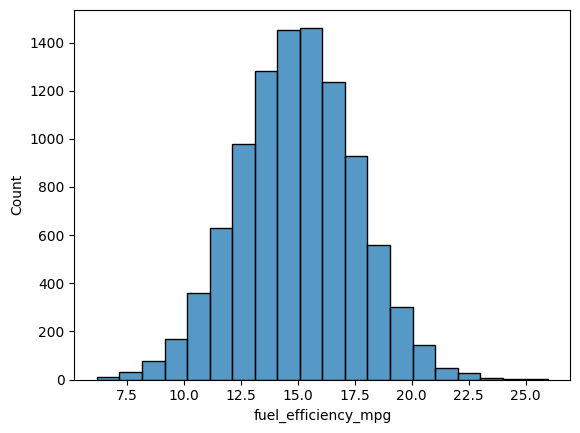

In [4]:
# normal distribution 
sns.histplot(df1.fuel_efficiency_mpg, bins=20)

In [5]:
for col in df1: 
    print(f'{col}: has {df1[col].isnull().sum()} null values')



engine_displacement: has 0 null values
horsepower: has 708 null values
vehicle_weight: has 0 null values
model_year: has 0 null values
fuel_efficiency_mpg: has 0 null values


In [6]:
np.random.seed(42)

In [7]:
def split_and_shuffle(df, n_val=0.2, n_test=0.2, random_state=42):
    np.random.seed(random_state)

    n = len(df)
    n_val = int(n * n_val)
    n_test = int(n * n_test)

    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    return df_train, df_val, df_test


In [8]:
df_train, df_val, df_test = split_and_shuffle(df1)

def fill_null(df, column, fill_value):
    df[column] = df[column].fillna(fill_value)
    return df


training_mean = df_train.horsepower.mean()
#df1 = df1.fillna(0) # fill null values with 0
df_train = fill_null(df_train, 'horsepower', training_mean).reset_index(drop=True)
df_val = fill_null(df_val, 'horsepower', training_mean).reset_index(drop=True)
df_test = fill_null(df_test, 'horsepower', training_mean).reset_index(drop=True)

/tmp/ipykernel_2589/1039225358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(fill_value)


In [9]:

X_train = df_train.drop('fuel_efficiency_mpg', axis=1).values
X_val = df_val.drop('fuel_efficiency_mpg', axis=1).values
X_test = df_test.drop('fuel_efficiency_mpg', axis=1).values
y_train = df_train.fuel_efficiency_mpg.values

In [10]:
# train the model

def train_linear_regression(X, y): 
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    #normal equation formula 
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]



In [11]:
x0, w = train_linear_regression(X_train, y_train)
print(f'x0: {x0}, w: {w}')

x0: 28.925259951002698, w: [ 0.00012093  0.01030308 -0.00501009 -0.00023463]


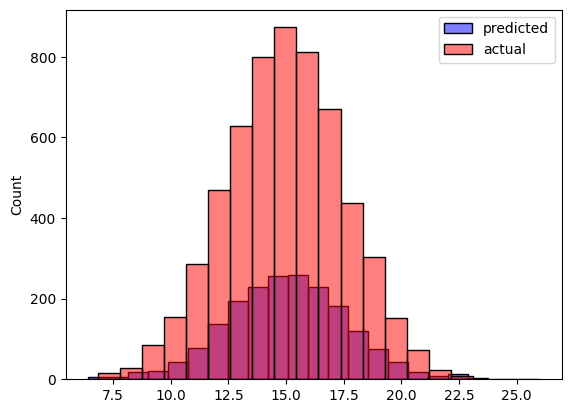

In [12]:
# prediction filling with 0 
y_pred = x0 + X_val.dot(w)

sns.histplot(y_pred, bins=20, color='blue', alpha=0.5)
sns.histplot(y_train, bins=20, color='red', alpha=0.5)
plt.legend(['predicted', 'actual'])

In [13]:
def rmse(y, y_pred):
    return np.sqrt(((y-y_pred)**2).mean())

print(f'RMSE: {rmse(df_val.fuel_efficiency_mpg.values, y_pred)}')

RMSE: 0.4635965042334585


With 0s: RMSE: 0.5173782638844466

With mean of training set:  RMSE: 0.4635965042334585

In [ ]:
def prepare_df(df):
    df_num = df.copy()
    df_num['age'] = df_num.model_year.max() - df_num.model_year
    df_num = df_num.drop('fuel_efficiency_mpg', axis=1)
    X_num = df_num.values
    return X_num


X_train_1 = prepare_df(df_train)
X_val_1 = prepare_df(df_val)

x0, w = train_linear_regression(X_train_1, y_train)
y_pred_1 = x0 + X_val_1.dot(w)
